This project highlights the usage of Logistic Regression to clasify survivors of the titanic. This is real data that requires some cleaning. This project demosnstrates how visualizations can help us understand a dataset and make decisions about how to clean and/or reformat the data.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
train = pd.read_csv( 'titanic_train.csv')

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


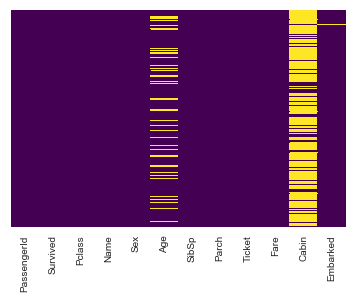

In [85]:
# Heatmaps are a great way to clearly detect null values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

In [86]:
sns.set_style('whitegrid')

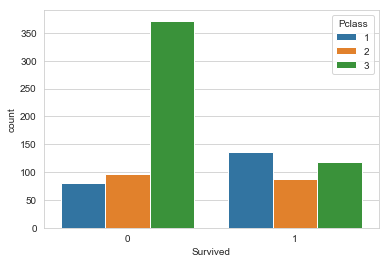

In [87]:
# trying to find any connections between survivors and the class of ticket that each individual bought
sns.countplot(x='Survived',hue='Pclass', data=train)

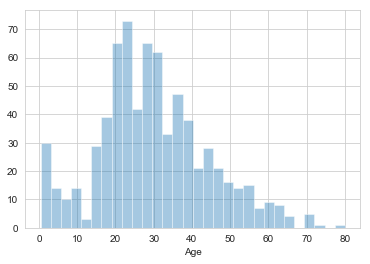

In [88]:
sns.distplot(train['Age'].dropna(),kde=False,bins= 30)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


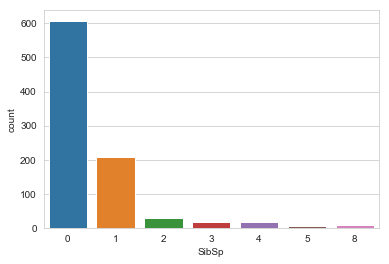

In [90]:
sns.countplot(x='SibSp',data=train)

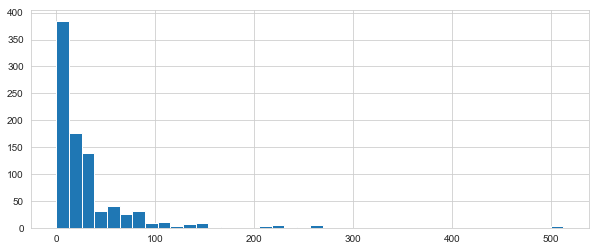

In [91]:
train['Fare'].hist(bins=40,figsize=(10,4))

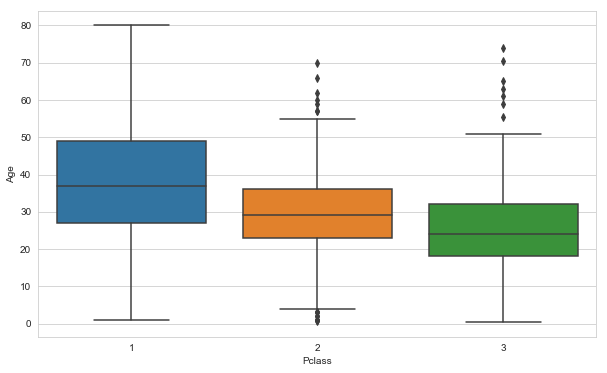

In [92]:
#finding the average ages in each class ()
plt.figure(figsize= (10,6))
sns.boxplot(x='Pclass',y='Age',data = train)

In [93]:
#imputation function that fills in the average age that we discovered in the last cell

def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [94]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

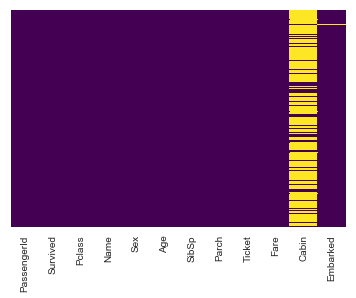

In [95]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
#too many null values to impute the missing data
train.drop('Cabin',axis=1,inplace=True)

In [97]:
#removing the final null values
train.dropna(inplace=True)

Now that we've cleaned the data of null values we now have to extract and/or transform the features that can be used in the logistic regression model. All numeric values will be used and any feature that contains categorical data will be transformed via one hot encoding. 

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [99]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [100]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [101]:
train = pd.concat([train,sex,embark], axis = 1)

In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [103]:
train.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [104]:
#now only numeric values remain, but Pclass still needs to be transformed to categories with one hot encoding 
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [105]:
Pclass = pd.get_dummies(train['Pclass'],drop_first= True)

In [106]:
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [107]:
train  = pd.concat([train,Pclass],axis=1)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [109]:
train.drop(['Pclass'],axis=1,inplace=True)

In [110]:
#the data is now ready to be fit to the model
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [111]:
X = train.drop('Survived', axis =1)
y = train['Survived']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression()

In [116]:
logmodel.fit(X_train,y_train)

C:\Users\rober\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
predictions = logmodel.predict(X_test)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[151  12]
 [ 34  70]]


              precision    recall  f1-score   support

           0       0.82      0.93      0.87       163
           1       0.85      0.67      0.75       104

   micro avg       0.83      0.83      0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

